# Sieć o połączeniach gęstych
## Model sekwencyjny w bibliotece Keras

W tym ćwiczeniu zapoznamy się z modelem sekwencyjnym w bibliotece Keras. Zbudujemy sieć o połączeniach gęstych złożoną z 3 warstw: wejściowej, ukrytej i wyjściowej.
Schemat obliczeń wykonywanych przez tą sieć przedstawiony jest na poniższych rysunkach:

[Schemat obliczeń w propagacji wstecznej - propagacja "do przodu"](https://brain.fuw.edu.pl/edu/index.php/Plik:Back_prop_forward-2.png)

[Schemat obliczeń w propagacji wstecznej - propagacja "do tyłu"](https://brain.fuw.edu.pl/edu/images/7/73/Back_prop_backward-2.png)

Warstwy ukryta i wyjściowa będą miały nieliniową funkcję aktywacji w postaci funkcji logistycznej (nazywana w tej biblitece `sigmoid`). Dla przypomnienia funkcja logistyczna:

$\qquad$ $g(x) = \frac{1}{1+exp(-x)}$

Niech nasza sieć uczy się odwzorowania zadanego tabelką:

|   X   |   Y   |
|:-----:|:-----:|
| [0,0] | [0] |
| [0,1] | [1] |
| [1,0] | [1] |
| [1,1] | [0] |

### Zaczniemy od importu podstawowych bibliotek:

In [0]:
import matplotlib
%matplotlib inline  
import matplotlib.pylab as plt
import numpy as np

### Zdefiniujmy zbiór uczący:

Wejście:

In [0]:
X = np.array([  [0,0],
                [0,1],
                [1,0],
                [1,1] ])

Wyjście:

In [0]:
Y = np.array([[0],
              [1],
              [1],
              [0]])

### Tworzymy model:

Modele w Keras zdefiniowane są jako sekwencje warstw.

Model tworzymy przez powołanie instancji obiektu klasy `Sequential`:

In [8]:
from keras.models import Sequential
model = Sequential()
%tensorflow_version 1.x

Using TensorFlow backend.


Teraz kolejno dodajemy warstwy, aż do osiągnięcia zaplanowanej architektury. To o co musimy zadbać to:
* rozmiar wejścia służy do tego: `input_dim` 
Jak wiele i jakich warstw trzeba użyć? Najczęsciej robimy to metodą prób i błędów. Ogólnie: potrzebujemy model o dostatecznym stopniu złożoności aby dało się w nim wyrazić nasz problem, ale nie za duży aby nie dochodziło do przeuczania i niepotrzebnje straty mocy obliczeniowej. 

W tym przykładzie stworzymy model o pełnych połączeniach między warstwami. Nazywany jest on: `fully-connected`. 

Modele o pełnych połączeniach są w Keras implementowane przez klasę `Dense` 
Możemy wyspecyfikować:
* liczbę neuronów (pierwszy argument)
* funkcję aktywacji
* sposób inicjalizacji wag
* [... (reszta w dokumnetacji) ](https://keras.io/layers/core/#dense)

My zbudujemy model o dwóch warstwach, z aktywacją sigmoidalną, inicjalizowane funkcją `inint`:

In [9]:
from keras.initializers import RandomUniform
%tensorflow_version 1.x
init = RandomUniform(minval=-0.05, maxval=0.05, seed=None)

from keras.layers import Dense
model.add(Dense(3, input_dim=2, activation='sigmoid',kernel_initializer=init, bias_initializer=init))
model.add(Dense(1, activation='sigmoid',kernel_initializer=init, bias_initializer=init))

In [0]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


### Kompilujemy model
[Kompilacja modelu](https://keras.io/models/sequential/#sequential-model-methods) to efektywnie prztłumaczenie go do postaci, którą rozumie `backend`, w naszym przypadku TensorFlow. 

W czasie kompilacji specyfikujemy:
* [funkcję kosztu](https://keras.io/losses/): weźmy błąd średniokwadratowy
* [optymalizator](https://keras.io/optimizers/): zastosujemy najprostszy stochastyczny gradient
* [miary jakości](https://keras.io/metrics/) które mają być wyliczane w procesie uczenia: niech to będzie  dokładność (`accuracy`).



In [12]:
from keras.optimizers import SGD
%tensorflow_version 1.x
sgd = SGD(lr=0.1, decay=0, momentum=0.8, nesterov=True)

model.compile(loss='mean_squared_error', 
              optimizer= sgd,
              metrics=['accuracy'])

### Fitujemy model
W procesie trenowania używamy metody [`.fit`](https://keras.io/models/sequential/#sequential-model-methods) specyfikujemy:
* zbiór uczący
* liczbę epok uczenia
* rozmiar batcha
* ...(reszta w dokumentacji)

* Zwracany obiekt `Historia` pozwala nam potem analizować co działo się w trakcie uczenia.

In [13]:
Historia = model.fit(X, Y, epochs=5000, batch_size=1, verbose=0 )
%tensorflow_version 1.x

### Badamy co nam wyszło:
* Metoda `.evaluate` podaje nam wartość miary, którą ustaliliśmy podczas kompilacji:

In [0]:
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 8ms/step

acc: 100.00%


* metoda `.predict` aplikuje wyuczony model do danych:

In [0]:
predictions = model.predict(X)
for i in range(4):
    print('%.2f | %d '%(predictions[i],Y[i]))

0.02 | 0 
0.98 | 1 
0.98 | 1 
0.02 | 0 


Oglądamy ewolucję funkcji błędu:

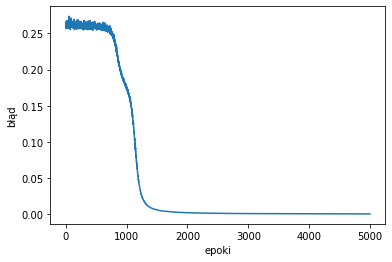

In [0]:
plt.plot(Historia.history['loss'])
plt.xlabel('epoki')
plt.ylabel('błąd')
plt.show()

oraz ewolucję wybranych przy kompliacji miar:

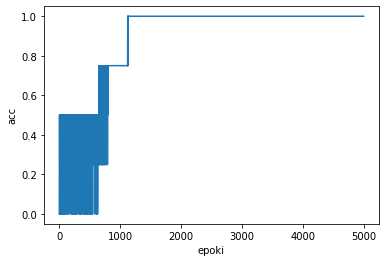

In [0]:
plt.plot(Historia.history['acc'])
plt.xlabel('epoki')
plt.ylabel('acc')
plt.show()

Możemy też podejrzeć wagi poszczególnych neuronów:

In [14]:
warstwy = model.layers
for i in range(len(warstwy)):
    print('wagi w warstwie %d'%i)
    w,b = warstwy[i].get_weights()
 
    for n in range(w.shape[1]):
        print('neuron '+str(n) + '\t w: '+ str(w[:,n]) +'\tb: ', str(b[n]))
    print('\n')



wagi w warstwie 0
neuron 0	 w: [-0.02040537 -0.01866521]	b:  1.6751233
neuron 1	 w: [-0.00188739 -0.00172802]	b:  -2.1206777
neuron 2	 w: [-0.00193464 -0.00177129]	b:  -2.1059542


wagi w warstwie 1
neuron 0	 w: [0.04396128 0.00558906 0.00566263]	b:  0.04813821




# Podsumowując w jednym kawałku kodu:

In [0]:
model = Sequential()
init = RandomUniform(minval=-5, maxval=5, seed=None)
from keras import regularizers

model.add(Dense(3, input_dim=2, activation='sigmoid',kernel_initializer=init, bias_initializer=init,
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid',kernel_initializer=init, bias_initializer=init,
                kernel_regularizer=regularizers.l2(0.01)))
sgd = SGD(lr=0.1, decay=0, momentum=0.8, nesterov=True)

model.compile(loss='mean_squared_error', 
              optimizer= sgd,
              metrics=['accuracy'])

Loss_hist =[]
wagi =[]
for ep in range(200):
    loss, acc = model.train_on_batch(X, Y)
    Loss_hist.append(loss)
    w0,b0 = model.layers[0].get_weights()
    w1,b1 = model.layers[1].get_weights()
    wagi.append(np.concatenate((w0.ravel(), b0.ravel(), w1.ravel(),b1.ravel())))



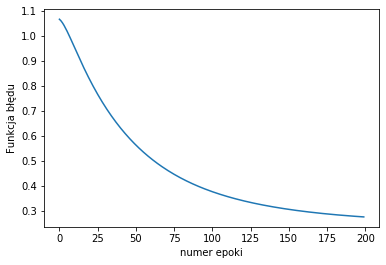

In [0]:
plt.plot(Loss_hist)
plt.xlabel('numer epoki')
plt.ylabel('Funkcja błędu')
plt.show()

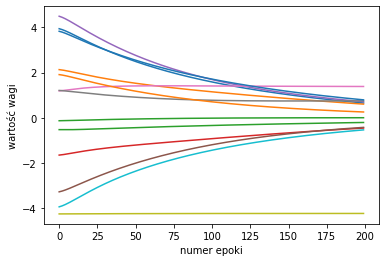

In [0]:
plt.plot(wagi)
plt.xlabel("numer epoki")
plt.ylabel('wartość wagi')
plt.show()

Model można zapisać (struktura, wagi i stan optymalizatora), a następnie wczytać go z pliku (aby dalej uczyć, albo korzystać z wyuczonego modelu).

Przy pracy w Colabie, do tego potrzebujemy podłączyć dysk Google'a, jak zwykle.

In [0]:
import h5py
model.save ('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [0]:
del model  # deletes the existing model

In [0]:
# returns a compiled model
# identical to the previous one
from keras.models import load_model
model = load_model('my_model.h5')

### Zadania
* Proszę zbadać co dzieje się z wagami i historią uczenia wraz ze wzrostem ilości jednostek w warstwie ukrytej.
* Proszę powtórzyć analizę dla sieci, której warstwa wyjściowa ma jednostkę liniową.
* Proszę sprawdzić co dzieje się wraz ze wzrostem liczby warstw.
* Proszę zbadać czy wybór funkcji błędu i optymalizatora ma w tym problemie znaczenie?

ad 1. Wzrost ilości jednosek (N) w warstwie ukrytej powoduje gwałtowny wzrost liczby wag. Im większe N tym więcej wag nie ulega zmianie podczas uczenia. Wzrost N nie poprawił jakości - funkcja błędu stabilizuje się na ~0.25 dla N=3,10,30 ... . Wzrost N wydłużył uczenie (czas potrzebny na stabilizację; osiągnięcie wartości 0.5 wymaga ~65, ~100, ~175 dla odpowiednio N=3,10,30).

ad 2. Zmiana jednostki wyjściowej na liniową daje mniej gładkie przebiegi uczenia (funckja błędu i wagi). Dla funkcji sigmoidlanje wagi albo nie ulegały  istotnej zmianie albo zbiegały do podobnych wartości. Dla funkcji liniowej rozbiegały i stabilizowały się na różnych poziomach albo rozbiegały i zbiegały do podobnych wartości. Dla funkcji liniowej pojawiają się również silne fluktuacje dla dużych sieci i bardzo małej liczby kroków (funkcja błędu może mieć pik na początku). Mała sieć (N=3) osiągnęła 0.5 funkcji błędu szybciej (40 vs 65 kroków). Średnia sieć (N=10) osiągnęła 0.5 funkcji błędu po podobnje liczbie kroków (~100). Niezależnie od wyboru funkcji stabilizacja funkcji błędu była na podobnym poziomie (~0.25) Duża sieć (N=30) uczyła się znacznie wolniej dla funkcji liniowej.

ad 3. Zwiększenie liczby warstw wydłuża czas uczenia. Funkcja błędu stabilizuje się na tym samym poziomie ~0.25. Rozłożenie warstwy środkowej o 30 jednostkach na 3 gęsto połączone warstwy po 10 jednostek wydłuża czas uczenia (~165 vs ~215 kroków do funkcji błędu ~0.5).

ad 4. Wybór optymalizatora ma wpływ na przebieg uczenia: zarówno typ jak i parametry. Przykładowo optymalizator AdaDelta zbiegał do 0.25 lecz znacznie wolniej niż SGD (przy tym samym parametrze lr (learning rate)). Zwiększenie lr z 0.1 na 0.9 dla optymalizatora SGD poskutkowało znacznie szybszą stabilizacją na poziomie 0.25 (10 vs 65 kroków przy N=3, funkcja sigmoidalna). Zmiana funkcji błędu np. z kwadratu błędu na wartość bezwzględną nie wywołała istotnych zmian.

In [3]:
#ad 1.#
#N=3  ~65   do 0.5  stabilizacja : ~0.250
#N=10 ~100  do 0.5  stabilizacja : ~0.251
#N=30 ~175  do 0.5  stabilizacja : ~0.252
model = Sequential()
init = RandomUniform(minval=-5, maxval=5, seed=None)
from keras import regularizers

N=3

model.add(Dense(N, input_dim=2, activation='sigmoid',kernel_initializer=init, bias_initializer=init,
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid',kernel_initializer=init, bias_initializer=init,
                kernel_regularizer=regularizers.l2(0.01)))
sgd = SGD(lr=0.1, decay=0, momentum=0.8, nesterov=True)

model.compile(loss='mean_squared_error', 
              optimizer= sgd,
              metrics=['accuracy'])

Loss_hist =[]
wagi =[]
M=1000
for ep in range(M):
    loss, acc = model.train_on_batch(X, Y)
    Loss_hist.append(loss)
    w0,b0 = model.layers[0].get_weights()
    w1,b1 = model.layers[1].get_weights()
    wagi.append(np.concatenate((w0.ravel(), b0.ravel(), w1.ravel(),b1.ravel())))

print("last: ",Loss_hist[M-1])

plt.plot(Loss_hist)
plt.xlabel('numer epoki')
plt.ylabel('Funkcja błędu')
plt.show()

plt.plot(wagi)
plt.xlabel("numer epoki")
plt.ylabel('wartość wagi')
plt.show()

scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions = model.predict(X)
for i in range(4):
    print('%.2f | %d '%(predictions[i],Y[i]))

NameError: ignored

In [0]:
#ad 2.#
#N=3
#N=3  ~40  do 0.5  stabilizacja : ~0.251
#N=10 ~100  do 0.5  stabilizacja : ~0.253
#N=30 >260  do 0.5  stabilizacja : ?
model = Sequential()
init = RandomUniform(minval=-5, maxval=5, seed=None)
from keras import regularizes

N=3

model.add(Dense(N, input_dim=2, activation='sigmoid',kernel_initializer=init, bias_initializer=init,
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid',kernel_initializer=init, bias_initializer=init,
                kernel_regularizer=regularizers.l2(0.01)))
sgd = SGD(lr=0.1, decay=0, momentum=0.8, nesterov=True)

model.compile(loss='mean_squared_error', 
              optimizer= sgd,
              metrics=['accuracy'])

Loss_hist =[]
wagi =[]
M=265
for ep in range(M):
    loss, acc = model.train_on_batch(X, Y)
    Loss_hist.append(loss)
    w0,b0 = model.layers[0].get_weights()
    w1,b1 = model.layers[1].get_weights()
    wagi.append(np.concatenate((w0.ravel(), b0.ravel(), w1.ravel(),b1.ravel())))

print("last: ",Loss_hist[M-1])

plt.plot(Loss_hist)
plt.xlabel('numer epoki')
plt.ylabel('Funkcja błędu')
plt.show()

plt.plot(wagi)
plt.xlabel("numer epoki")
plt.ylabel('wartość wagi')
plt.show()

scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions = model.predict(X)
for i in range(4):
    print('%.2f | %d '%(predictions[i],Y[i]))

ImportError: ignored

last:  5.6086884


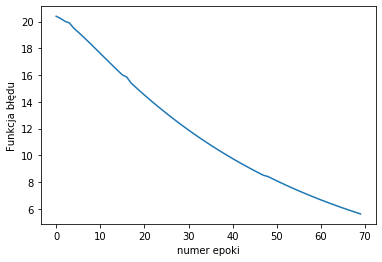

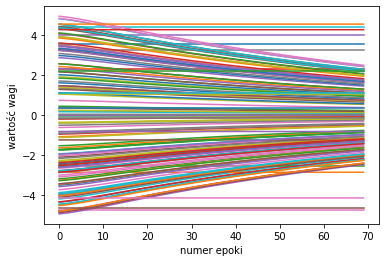

4/4 [==============================] - 0s 96ms/step

acc: 50.00%
0.00 | 0 
0.00 | 1 
0.00 | 1 
0.00 | 0 


In [37]:
#ad 3.#
#N=3 x 1
#N=3 x 3
#N=3 x 10
model = Sequential()
init = RandomUniform(minval=-5, maxval=5, seed=None)
from keras import regularizers

N=10

model.add(Dense(N, input_dim=2, activation='sigmoid',kernel_initializer=init, bias_initializer=init,
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(N, activation='sigmoid',kernel_initializer=init, bias_initializer=init,
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(N, activation='sigmoid',kernel_initializer=init, bias_initializer=init,
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid',kernel_initializer=init, bias_initializer=init,
                kernel_regularizer=regularizers.l2(0.01)))
sgd = SGD(lr=0.1, decay=0, momentum=0.8, nesterov=True)

model.compile(loss='mean_squared_error', 
              optimizer= sgd,
              metrics=['accuracy'])

Loss_hist =[]
wagi =[]
M=70
for ep in range(M):
    loss, acc = model.train_on_batch(X, Y)
    Loss_hist.append(loss)
    w0,b0 = model.layers[0].get_weights()
    w1,b1 = model.layers[1].get_weights()
    wagi.append(np.concatenate((w0.ravel(), b0.ravel(), w1.ravel(),b1.ravel())))

print("last: ",Loss_hist[M-1])

plt.plot(Loss_hist)
plt.xlabel('numer epoki')
plt.ylabel('Funkcja błędu')
plt.show()

plt.plot(wagi)
plt.xlabel("numer epoki")
plt.ylabel('wartość wagi')
plt.show()

scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions = model.predict(X)
for i in range(4):
    print('%.2f | %d '%(predictions[i],Y[i]))

last:  0.50372595


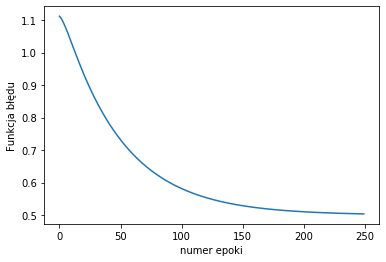

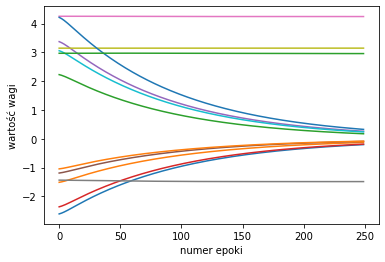

4/4 [==============================] - 1s 132ms/step

acc: 50.00%
0.96 | 0 
0.96 | 1 
0.96 | 1 
0.96 | 0 


In [43]:
#ad 4.#
#N=10 ~100  do 0.5  stabilizacja : ~0.251
model = Sequential()
init = RandomUniform(minval=-5, maxval=5, seed=None)
from keras import regularizers
from keras import optimizers

N=3

model.add(Dense(N, input_dim=2, activation='sigmoid',kernel_initializer=init, bias_initializer=init,
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid',kernel_initializer=init, bias_initializer=init,
                kernel_regularizer=regularizers.l2(0.01)))
sgd = SGD(lr=0.1, decay=0, momentum=0.8, nesterov=True)
adadelta=optimizers.Adadelta(lr=0.9, rho=0.95, epsilon=None, decay=0.0)

model.compile(loss='mean_absolute_error', 
              optimizer= sgd,
              metrics=['accuracy'])

Loss_hist =[]
wagi =[]
M=250
for ep in range(M):
    loss, acc = model.train_on_batch(X, Y)
    Loss_hist.append(loss)
    w0,b0 = model.layers[0].get_weights()
    w1,b1 = model.layers[1].get_weights()
    wagi.append(np.concatenate((w0.ravel(), b0.ravel(), w1.ravel(),b1.ravel())))

print("last: ",Loss_hist[M-1])

plt.plot(Loss_hist)
plt.xlabel('numer epoki')
plt.ylabel('Funkcja błędu')
plt.show()

plt.plot(wagi)
plt.xlabel("numer epoki")
plt.ylabel('wartość wagi')
plt.show()

scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions = model.predict(X)
for i in range(4):
    print('%.2f | %d '%(predictions[i],Y[i]))